---
title: PA 9.1
author: Marvin (Wenxiang) Li
format:
    html:
        toc: False
        code-fold: true
embed-resources: true
---

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [83]:
import numpy as np
import pandas as pd
HeartAttack = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
HeartAttack

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


In [84]:
print(HeartAttack['diagnosis'])

0      No Disease
1         Disease
2      No Disease
3         Disease
4         Disease
          ...    
199    No Disease
200       Disease
201       Disease
202       Disease
203       Disease
Name: diagnosis, Length: 204, dtype: object


In [85]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, FunctionTransformer

In [86]:
HeartAttack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       204 non-null    object
 1   age        204 non-null    int64 
 2   sex        204 non-null    int64 
 3   cp         204 non-null    int64 
 4   trtbps     204 non-null    int64 
 5   chol       204 non-null    int64 
 6   restecg    204 non-null    int64 
 7   thalach    204 non-null    int64 
 8   diagnosis  204 non-null    object
dtypes: int64(7), object(2)
memory usage: 14.5+ KB


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [134]:
X = HeartAttack[["age","chol"]]
y = HeartAttack["diagnosis"]

In [135]:
ct = ColumnTransformer(
  [
    ("keep", FunctionTransformer(None),["age","chol"])
  ],
  remainder = "drop"
)
model_1 = Pipeline(
  [
    ("column_transformer", ct),
    ("logistic_regression", LogisticRegression(random_state = 42))
  ]
)

- coefficient

In [136]:
model_1_fitted = model_1.fit(X,y)
coef1 = model_1_fitted.named_steps['logistic_regression'].coef_
w11, w12 = coef1[0]

In [137]:
intercept = model_1.named_steps["logistic_regression"].intercept_
b1 = intercept

- cutting point is p = 0.5

In [138]:
# (ln(p/1-p)-intercept-beta1 * x1) / beta2
(np.log(0.5/(1-0.5)) - b1 - w11 * 55) / w12

array([367.8748898])

In [139]:
# (ln(p/1-p)-intercept-beta1 * x1) / beta2
(np.log(0.9/(1-0.9)) - b1 - w11 * 55) / w12

array([1587.71587928])

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [94]:
ct = ColumnTransformer(
  [
    ("keep", FunctionTransformer(None),["age","chol"])
  ],
  remainder = "drop"
)
model_2 = Pipeline(
  [
    ("column_transformer", ct),
    ("model", LinearDiscriminantAnalysis())
  ]
)

In [144]:
model_2_fitted = model_2.fit(X,y)
coef2 = model_2_fitted.named_steps['model'].coef_
w21, w22 = coef2[0]

In [96]:
intercept2 = model_2_fitted.named_steps['model'].intercept_
b2 = intercept2[0]

In [145]:
-(w21 * 55 + b2) / w22

368.235357529938

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [99]:
model_3 = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('model', SVC(kernel='linear'))  # SVC model
])

In [146]:
model_3_fitted = model_3.fit(X,y)
coef3 = model_3_fitted.named_steps['model'].coef_
w31, w32 = coef3[0]

In [147]:
intercept3 = model_3_fitted.named_steps['model'].intercept_
b3 = intercept3[0]

### Answering question: chol_scaled = -(w1 * age_scaled + b) / w2

- get age_scaled

In [102]:
std_age = HeartAttack['age'].std()
mean_age = HeartAttack['age'].mean()
age_scaled = (55 - mean_age) / std_age
age_scaled

0.1268094358001019

In [103]:
std_chol = HeartAttack['chol'].std()
std_chol

53.17662438198394

In [104]:
mean_chol = HeartAttack['chol'].mean()
mean_chol

248.37745098039215

In [105]:
chol_scaled = -(w31 * age_scaled + b3) / w32
chol_scaled

1.2134896072478982

- chol = chol_scaled * std_chol + mean_chol

In [106]:
chol = chol_scaled * std_chol + mean_chol
chol

312.90673201645484

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [107]:
import plotnine as p9

In [157]:
age_max = HeartAttack['age'].max()
age_min = HeartAttack['age'].min()
age_std = HeartAttack['age'].std()
age_mean = HeartAttack['age'].mean()
age_max_sacled = (age_max - age_mean) / age_std
age_min_sacled = (age_min - age_mean) / age_std
age_max_sacled, age_min_sacled

(2.478548063365626, -2.652518033140972)

In [110]:
age = np.linspace(29, 77, 100)

### Model 1

In [140]:
chol1 = -(w11 * age + b1) / w12
boundary_df1 = pd.DataFrame({
    'age': age,
    'chol': chol1
})

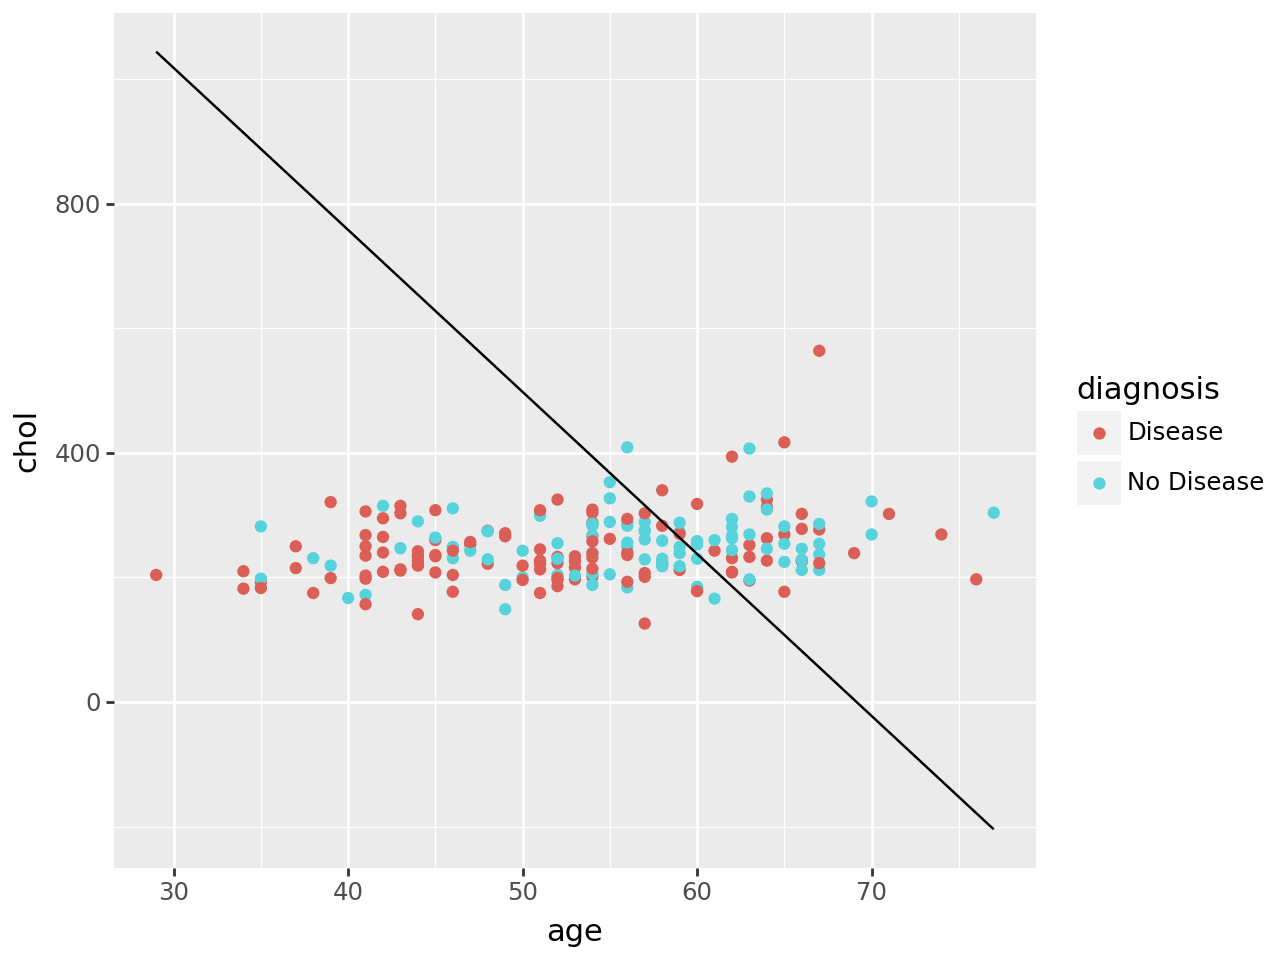

In [141]:
(p9.ggplot() +
p9.geom_point(data = HeartAttack, mapping = p9.aes(x = 'age', y = 'chol', color = 'diagnosis')) +
p9.geom_line(data = boundary_df1, mapping = p9.aes(x = 'age', y = 'chol'))
)

### Model 2

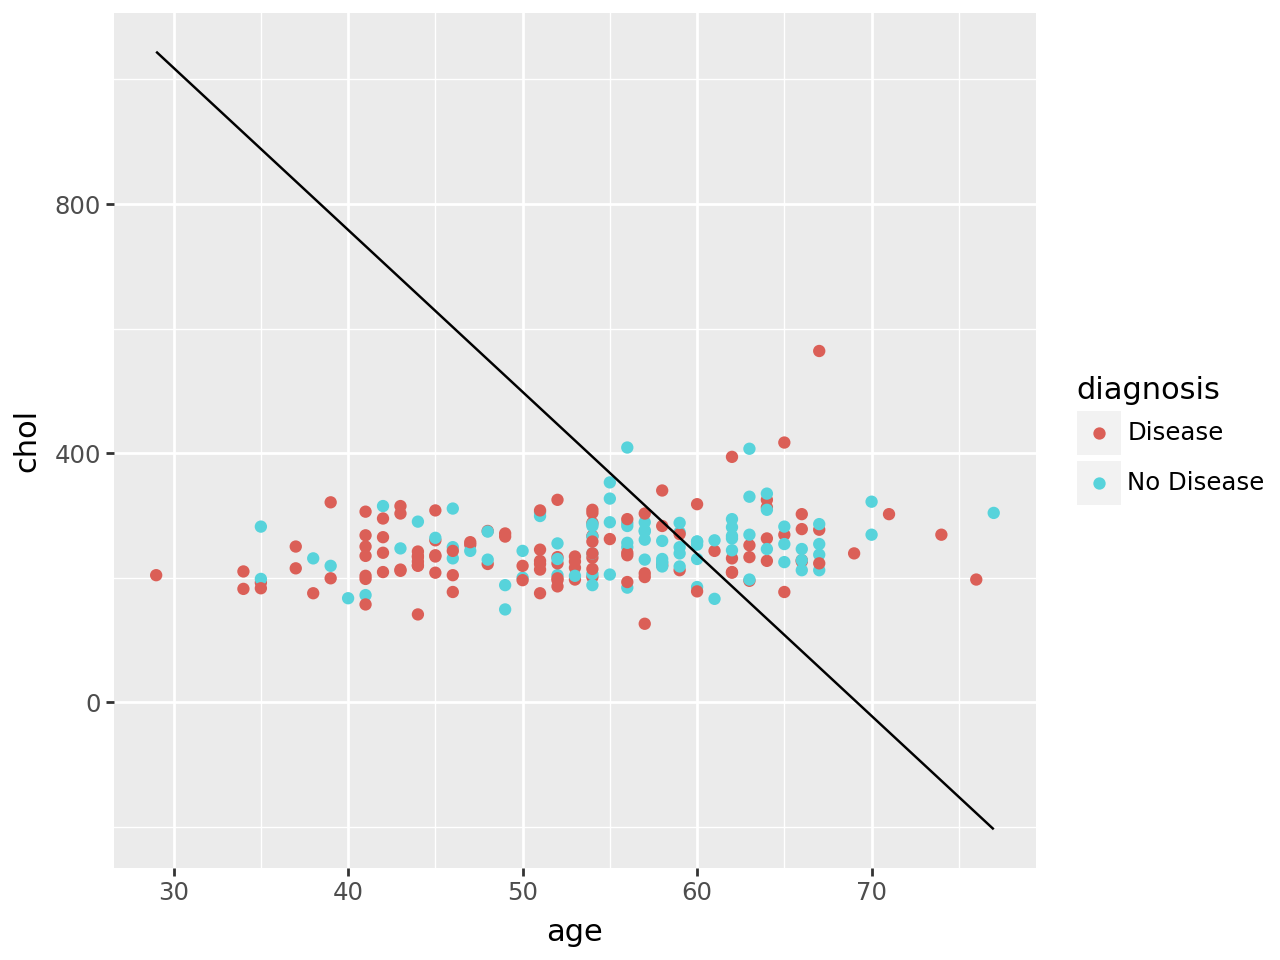

In [143]:
chol2 = -(w21 * age + b2) / w22
boundary_df2 = pd.DataFrame({
    'age': age,
    'chol': chol2
})
(p9.ggplot() +
p9.geom_point(data = HeartAttack, mapping = p9.aes(x = 'age', y = 'chol', color = 'diagnosis')) +
p9.geom_line(data = boundary_df2, mapping = p9.aes(x = 'age', y = 'chol'))
)

### Model 3

In [158]:
chol_max = HeartAttack['chol'].max()
chol_min = HeartAttack['chol'].min()
chol_std = HeartAttack['chol'].std()
chol_mean = HeartAttack['chol'].mean()
chol_max_scaled = (chol_max - chol_mean) / chol_std
chol_min_scaled = (chol_min - chol_mean) / chol_std
chol_max_scaled, chol_min_scaled

(5.935362627616124, -2.3013392144134146)

In [159]:
age_scale = np.linspace(age_min_sacled, age_max_sacled, 100)

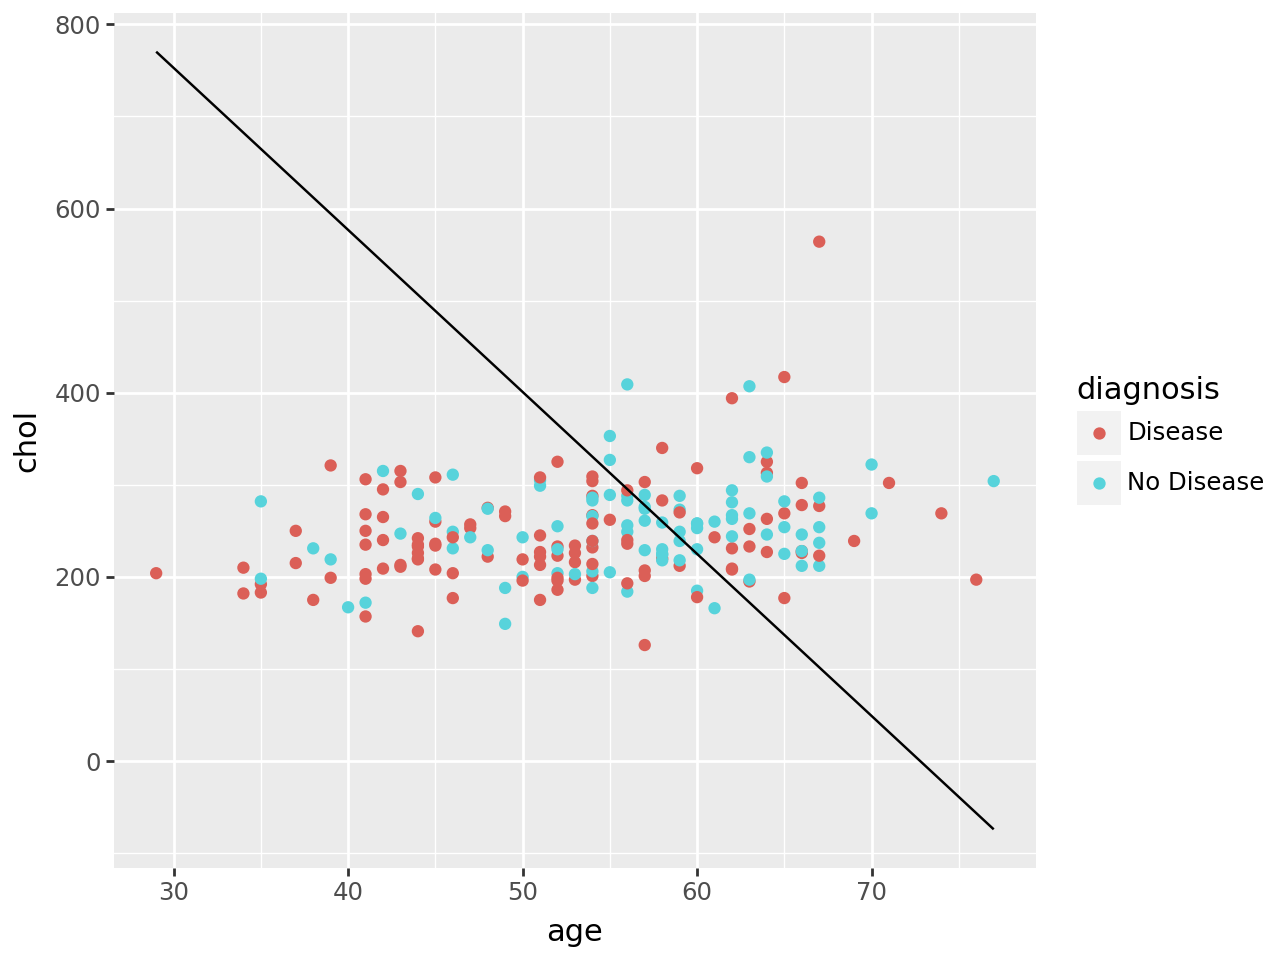

In [160]:
chol3_scale = -(w31 * age_scale + b3) / w32
chol3 = chol3_scale * chol_std + chol_mean
boundary_df3 = pd.DataFrame({
    'age': age,
    'chol': chol3
})
(p9.ggplot() +
p9.geom_point(data = HeartAttack, mapping = p9.aes(x = 'age', y = 'chol', color = 'diagnosis')) +
p9.geom_line(data = boundary_df3, mapping = p9.aes(x = 'age', y = 'chol'))
)